<a href="https://colab.research.google.com/github/math8485/Deep-learning-assignment-2/blob/main/Gradient_Descent_Exercise_Attention_Mechanism_Exercise_Deep_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 2.1 - Gradient Descent Exercise

In [ ]:
# import necessary libraries
import numpy as np  # Matrix and vector computation package
import pandas as pd
import matplotlib.pyplot as plt  # Plotting library
from tqdm import tqdm_notebook


In [ ]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate 300 observations
observations = 300

# Generate random values for square meters and price
square_meters = np.random.uniform(80, 250, observations)
price = 1000 * square_meters + np.random.normal(0, 20000, observations)

# Create a pandas DataFrame
house_data = pd.DataFrame({'Square Meters': square_meters, 'Price': price})

data = pd.DataFrame({'X': square_meters, 'Y': price})

# Display the first few rows of the DataFrame
print(data.head())


            X              Y
0  143.671820  144583.257002
1  241.621432  228589.425138
2  204.438970  247317.851894
3  181.771942  194450.322760
4  106.523169   66020.317142


In [ ]:
# Using sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_s = pd.DataFrame(data_scaled, columns=data.columns)

In [ ]:
# Initializing Hyperparameters
epochs = 1
learning_rate = 2

# Initializing Parameters
w = 10

# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
def nn(x, w):
    """Output function y = x * w"""
    return x * w

# 1.2 Loss Function
def loss(y, t):
    """Calculate the Mean Squared Error"""
    return np.mean((t - y)**2)

# 1.3 Optmization Approach
def gradient(w, x, t):
    """Compute the gradient."""
    y = x * w
    return np.mean(2 * x * (y - t))

def delta_w(w_i, x, t, learning_rate):
    """Compute the weight update."""
    return learning_rate * gradient(w_i, x, t)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in range(epochs):
    total_loss = 0
    for i in range(len(data_s['X'])):
        x_i, t_i = data_s['X'][i], data_s['Y'][i]

        # 2. Forward Pass
        output = nn(x_i, w)

        # 3. FeedForward Evaluation
        loss_val = loss(output, t_i)

        # 4. Backward Pass / Gradient Calculation
        grad_value = gradient(w, x_i, t_i)  # Compute gradient
        dw = delta_w(w, x_i, t_i, learning_rate)

        # 5. Back Propagation / Update Weights
        w = w - dw

        w_his.append(w)

        # Accumulate loss
        total_loss += loss_val

        # Print gradient, dw, weight, and loss values in a single line
        print(f"Epoch {epoch+1}, Sample {i+1}: Gradient = {grad_value:.4f}, Δw = {dw:.4f}, w: {w:.4f}, loss: {loss_val:.4f}")

    # Print average loss for the epoch
    avg_loss = total_loss / len(data_s['X'])
    print(f"Epoch {epoch+1}: Average Loss = {avg_loss:.4f}\n")


Epoch 1, Sample 1: Gradient = 2.5165, Δw = 5.0330, w: 4.9670, loss: 11.2516
Epoch 1, Sample 2: Gradient = 7.6884, Δw = 15.3769, w: -10.4098, loss: 16.0332
Epoch 1, Sample 3: Gradient = -12.5890, Δw = -25.1781, w: 14.7682, loss: 72.7449
Epoch 1, Sample 4: Gradient = 9.9856, Δw = 19.9713, w: -5.2030, loss: 68.6393
Epoch 1, Sample 5: Gradient = -0.2606, Δw = -0.5212, w: -4.6818, loss: 0.7228
Epoch 1, Sample 6: Gradient = -0.2954, Δw = -0.5908, w: -4.0911, loss: 0.9290
Epoch 1, Sample 7: Gradient = -0.0344, Δw = -0.0688, w: -4.0223, loss: 0.1021
Epoch 1, Sample 8: Gradient = -7.6053, Δw = -15.2107, w: 11.1884, loss: 18.9199
Epoch 1, Sample 9: Gradient = 7.5987, Δw = 15.1973, w: -4.0090, loss: 39.4195
Epoch 1, Sample 10: Gradient = -4.9850, Δw = -9.9699, w: 5.9610, loss: 12.1957
Epoch 1, Sample 11: Gradient = -0.0025, Δw = -0.0050, w: 5.9660, loss: 0.0063
Epoch 1, Sample 12: Gradient = 9.6629, Δw = 19.3257, w: -13.3597, loss: 24.3276
Epoch 1, Sample 13: Gradient = -19.9085, Δw = -39.8170, w

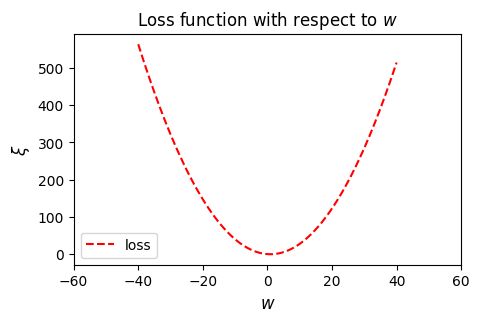

In [ ]:
def plot_loss_vs_weight(data, loss_function, nn_function):
    # Vector of weights and their corresponding losses
    ws = np.linspace(-40, 40, num=1000)
    loss_ws = np.vectorize(lambda w: loss_function(nn_function(data.X, w), data.Y))(ws)

    # Plot
    plt.figure(figsize=(5, 3))
    plt.plot(ws, loss_ws, 'r--', label='loss')
    plt.xlabel('$w$', fontsize=12)
    plt.ylabel('$\\xi$', fontsize=12)
    plt.title('Loss function with respect to $w$')
    plt.xlim(-60, 60)
    plt.legend()
    plt.show()
    return loss_ws, ws

# Using the function to plot
loss_ws, ws = plot_loss_vs_weight(data_s, loss, nn)

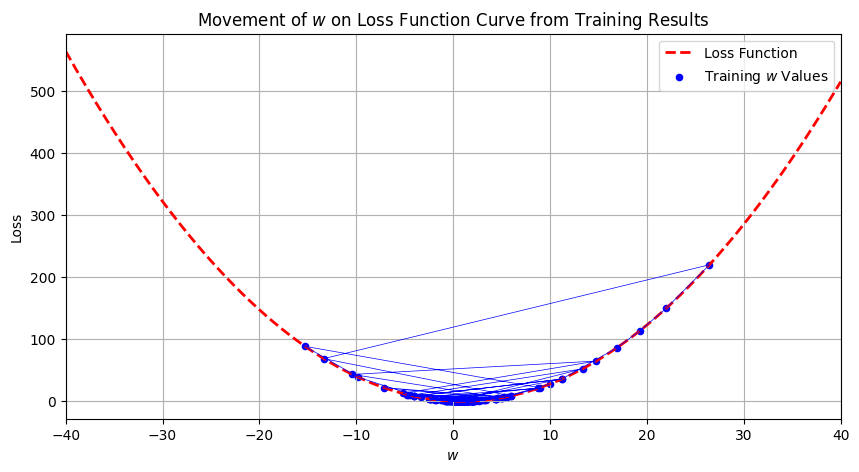

In [ ]:
# Plotting Loss Function Curve
plt.figure(figsize=(10, 5))
plt.plot(ws, loss_ws, 'r--', label='Loss Function', linewidth=2)

# Plotting w values from the training
plt.scatter(w_his, np.interp(w_his, ws, loss_ws), color='blue', s=20, label='Training $w$ Values')
plt.plot(w_his, np.interp(w_his, ws, loss_ws), color='blue', linestyle='-', linewidth=0.5)

plt.title('Movement of $w$ on Loss Function Curve from Training Results')
plt.xlabel('$w$')
plt.ylabel('Loss')
plt.xlim(-40, 40)
plt.legend()
plt.grid(True)
plt.show()

Now we do this by hand because reasons

First we just look at and call the true values of the first observations for our two variables

In [ ]:
data_s['Y'][0]

0.3967435458012375

In [ ]:
data_s['X'][0]

0.3751080568427013

We then calculate our output, based on the output function y = x * w

In [ ]:
# Output
data_s['X'][0] * 10

3.751080568427013

next we find calculate the loss function by using the function mean((t - y)**2)

In [ ]:
# Loss function
np.mean((data_s['Y'][0] - (data_s['X'][0] * 10))**2)

11.251576861357954

Now calculating the gradiant

In [ ]:
# Gradient
np.mean(2 * (data_s['X'][0] * ((data_s['X'][0] * 10) - data_s['Y'][0])))

2.516477685105374

Lastly calculating the new weight

In [ ]:
# New weight
10 - (2 * np.mean(2 * (data_s['X'][0] * ((data_s['X'][0] * 10) - data_s['Y'][0]))))

4.967044629789252

From the above calculations we get the following:
Loss = 11.25
Gradient = 2.52
New Weight = 4.97

Based on this we repeat the process for the second observation

In [ ]:
# Output
data_s['X'][1] * 10

9.600610633789067

In [ ]:
# Loss function
np.mean((data_s['Y'][1] - (data_s['X'][1] * 4.967044629789252))**2)

16.033155862597592

In [ ]:
# Gradient
np.mean(2 * (data_s['X'][1] * ((data_s['X'][1] * 4.967044629789252) - data_s['Y'][1])))

7.688442301793686

In [ ]:
# New weight
4.967044629789252 - (2 * np.mean(2 * (data_s['X'][1] * ((data_s['X'][1] * 4.967044629789252) - data_s['Y'][1]))))

-10.409839973798121

# PART 2.2 - Attention Mechanism Exercise

The key unlocked the mystery box, revealing its hidden contents.

Learning to play the piano key by key requires patience and practice.

In [ ]:
import torch
from sklearn.decomposition import PCA

In [ ]:
!pip install transformers --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.6 MB/s eta 0:00:00


First of we tokenize our sentences and create text embeddings using the BERT model

In [ ]:
from transformers import BertTokenizer, BertModel

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize the two sentences
sentence1 = "the key unlocked the mystery box revealing its hidden contents"
sentence2 = "learning to play the piano key by key requires patience and practice"
inputs1 = tokenizer(sentence1, return_tensors="pt", add_special_tokens=True)
inputs2 = tokenizer(sentence2, return_tensors="pt", add_special_tokens=True)

# Get the token IDs for the two sentences (input to the model)
input_ids1 = inputs1['input_ids']
input_ids2 = inputs2['input_ids']

# Forward pass through BERT to get the embeddings
with torch.no_grad():
    outputs1 = model(input_ids1)

with torch.no_grad():
    outputs2 = model(input_ids2)

# Remove the batch dimension
embeddings1 = outputs1.last_hidden_state.squeeze(0)
embeddings2 = outputs2.last_hidden_state.squeeze(0)

Just looking at the shape of the embeddings

In [ ]:
embeddings1.shape

torch.Size([12, 768])

In [ ]:
embeddings2.shape

torch.Size([14, 768])

Nextt up we use dimentionality reduction to better visualize the model later. At the same tine given the simplicity of the task and the over kvalified BERT model, we run into problems if we dont use dimentionality reduction. In the later heatmap the wheights of the words will be 0 except with themself

In [ ]:
# Create a PCA object to reduce to 2 dimensions
pca = PCA(n_components=2)

# Fit and transform the embeddings using PCA
reduced_embeddings1 = pca.fit_transform(embeddings1[2:11])
reduced_embeddings2 = pca.fit_transform(embeddings1[2:13])

After using PCA we follow the three steps of attention mechanism

In [ ]:
# Initialize matrices for Q, K, V
Q_1 = np.array(reduced_embeddings1)
K_1 = np.array(reduced_embeddings1)
V_1 = np.array(reduced_embeddings1)

# Initialize matrices for Q, K, V
Q_2 = np.array(reduced_embeddings2)
K_2 = np.array(reduced_embeddings2)
V_2 = np.array(reduced_embeddings2)


# Step 1: Similarity - Calculate dot products for Q and K (attention scores)
attention_scores_1 = Q_1.dot(K_1.T)
attention_scores_2 = Q_2.dot(K_2.T)


# Step 2: Weights - Apply softmax to attention scores
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

attention_weights_1 = np.apply_along_axis(softmax, 1, attention_scores_1)
attention_weights_2 = np.apply_along_axis(softmax, 1, attention_scores_2)

# Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors
attention_output_1 = attention_weights_1.dot(V_1)
attention_output_2 = attention_weights_2.dot(V_2)

Next part just shows the results from the three steps

In [ ]:
print(attention_scores_1)
print(attention_scores_2)

[[ 70.83539937  18.59022571 -31.63644263  28.22072273  15.1301893
  -24.26851789 -41.03394922 -17.54339877 -18.2942286 ]
 [ 18.59022571  19.5052461   10.28497976   5.67658592 -14.27451803
   14.22999382 -15.80903747  -8.04275859 -30.16071723]
 [-31.63644263  10.28497976  37.7513965  -14.80212178 -29.94424703
   37.01684528  11.92155547   3.46529028 -24.05725586]
 [ 28.22072273   5.67658592 -14.80212178  11.44765638   8.18556054
  -12.10461655 -15.75183278  -6.58260934  -4.28934511]
 [ 15.1301893  -14.27451803 -29.94424703   8.18556054  25.99144441
  -30.87950309  -2.47770207   0.54222053  27.72655544]
 [-24.26851789  14.22999382  37.01684528 -12.10461655 -30.87950309
   37.32525988   6.96034384   1.16765371 -29.44745899]
 [-41.03394922 -15.80903747  11.92155547 -15.75183278  -2.47770207
    6.96034384  25.50707391  11.34753034  19.33601798]
 [-17.54339877  -8.04275859   3.46529028  -6.58260934   0.54222053
    1.16765371  11.34753034   5.1532848   10.49278703]
 [-18.2942286  -30.160717

In [ ]:
print(attention_weights_1)
print(attention_weights_2)

[[1.00000000e+00 2.04272249e-23 3.14083028e-45 3.10943215e-19
  6.41999442e-25 4.97615070e-42 2.60470901e-49 4.14548789e-39
  1.95656553e-39]
 [2.84912357e-01 7.11376630e-01 7.04350454e-05 7.02083527e-07
  1.51961801e-15 3.63987640e-03 3.27567727e-16 7.72953146e-13
  1.91622182e-22]
 [4.95523900e-31 7.96722390e-13 6.75803212e-01 1.01418517e-23
  2.69138493e-30 3.24196788e-01 4.09319865e-12 8.70068638e-16
  9.69758507e-28]
 [9.99999946e-01 1.61884684e-10 2.06735953e-19 5.19457257e-08
  1.98993822e-09 3.06851073e-18 7.99763843e-20 7.67546877e-16
  7.60425911e-15]
 [2.87685902e-06 4.88220989e-19 7.64433319e-26 2.77271116e-09
  1.49934558e-01 3.00028880e-26 6.48497820e-14 1.32875295e-12
  8.50062562e-01]
 [1.02555788e-27 5.37837866e-11 4.23501764e-01 1.96641604e-22
  1.37989418e-30 5.76498236e-01 3.74526457e-14 1.14221838e-16
  5.77796140e-30]
 [1.26093782e-29 1.13692980e-18 1.25596386e-06 1.20386374e-18
  7.00582120e-13 8.79731834e-09 9.97913358e-01 7.07426290e-07
  2.08466991e-03]
 [1.98

In [ ]:
print(attention_output_1)
print(attention_output_2)

[[ 6.84907004 -4.89138415]
 [ 1.62857257 -4.53077932]
 [-5.7517071  -2.0742717 ]
 [ 6.84906984 -4.89138396]
 [ 2.40732487  6.08630042]
 [-5.64908295 -2.3106175 ]
 [-3.19065982  3.91166644]
 [-1.62447581  4.72174111]
 [ 2.08484579  6.65935908]]
[[-2.42039952  6.7084116 ]
 [-1.79850325 -2.84765141]
 [-0.48684498 -5.83394094]
 [-2.42032157  6.70720234]
 [-2.42039694  6.70837287]
 [-0.50110686 -5.82104072]
 [-0.58597661 -5.74275972]
 [-1.21644614 -4.54204553]
 [-2.4197892   6.69876447]
 [15.21177734  1.09370671]]


Lastly we create two heatmaps for the different sentences

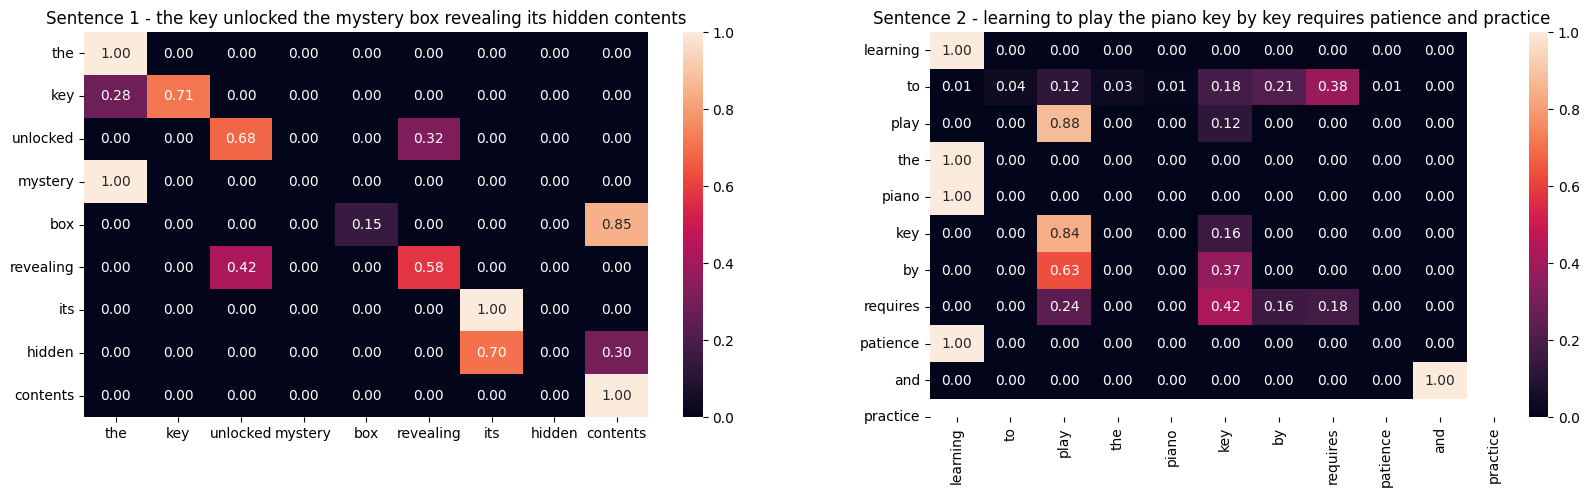

In [ ]:
import seaborn as sns

# Preparing sentences
sen1 = ["the", "key", "unlocked", "mystery", "box", "revealing", "its", "hidden", "contents"]
sen2 = ["learning", "to", "play", "the", "piano", "key", "by", "requires", "patience", "and", "practice"]

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Sentence 1: "the key unlocked the mystery box revealing its hidden contents"
# Create a heatmap for the attention weights of the first sentence
sns.heatmap(attention_weights_1, annot=True, fmt=".2f", xticklabels=sen1, yticklabels=sen1, ax=axes[0])
axes[0].set_title('Sentence 1 - the key unlocked the mystery box revealing its hidden contents')

# Sentence 2: "learning to play the piano key by key requires patience and practice"
# Create a heatmap for the attention weights of the second sentence
sns.heatmap(attention_weights_2, annot=True, fmt=".2f", xticklabels=sen2, yticklabels=sen2, ax=axes[1])
axes[1].set_title('Sentence 2 - learning to play the piano key by key requires patience and practice')

plt.show()